# Preparation

<b>Load Libraries</b>

In [4]:
# data structures 
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import qqplot
## settings
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme('notebook')

# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

<b>Load Dataset</b>

In [11]:
# dataset
df_base = pd.read_csv('../../dataset/cleaned/train.csv')
df_base['area_code'] = df_base['area_code'].astype(str)

## dtype columns separaton
num_cols = df_base.select_dtypes(np.number).columns.tolist()
cat_cols = df_base.select_dtypes('object').columns.tolist()

# Exploratory Data Analysis

<b>Univariate Analysis</b>

In [9]:
# summarize statistics
df_base[num_cols].describe([0.01, 0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
account_length,4250.0,100.236235,39.698401,1.0,13.0000,73.0000,100.00,127.0000,194.0000,243.00
area_code,4250.0,436.816000,42.183514,408.0,408.0000,408.0000,415.00,415.0000,510.0000,510.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.0000,0.00,16.0000,43.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,55.0450,143.3250,180.45,216.2000,304.8550,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,54.0000,87.0000,100.00,113.0000,145.5100,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,9.3592,24.3650,30.68,36.7500,51.8259,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,80.2940,165.9250,200.70,233.7750,318.6510,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,54.0000,87.0000,100.00,114.0000,147.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,6.8245,14.1025,17.06,19.8675,27.0851,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,81.9430,167.2250,200.45,234.7000,317.5550,395.00


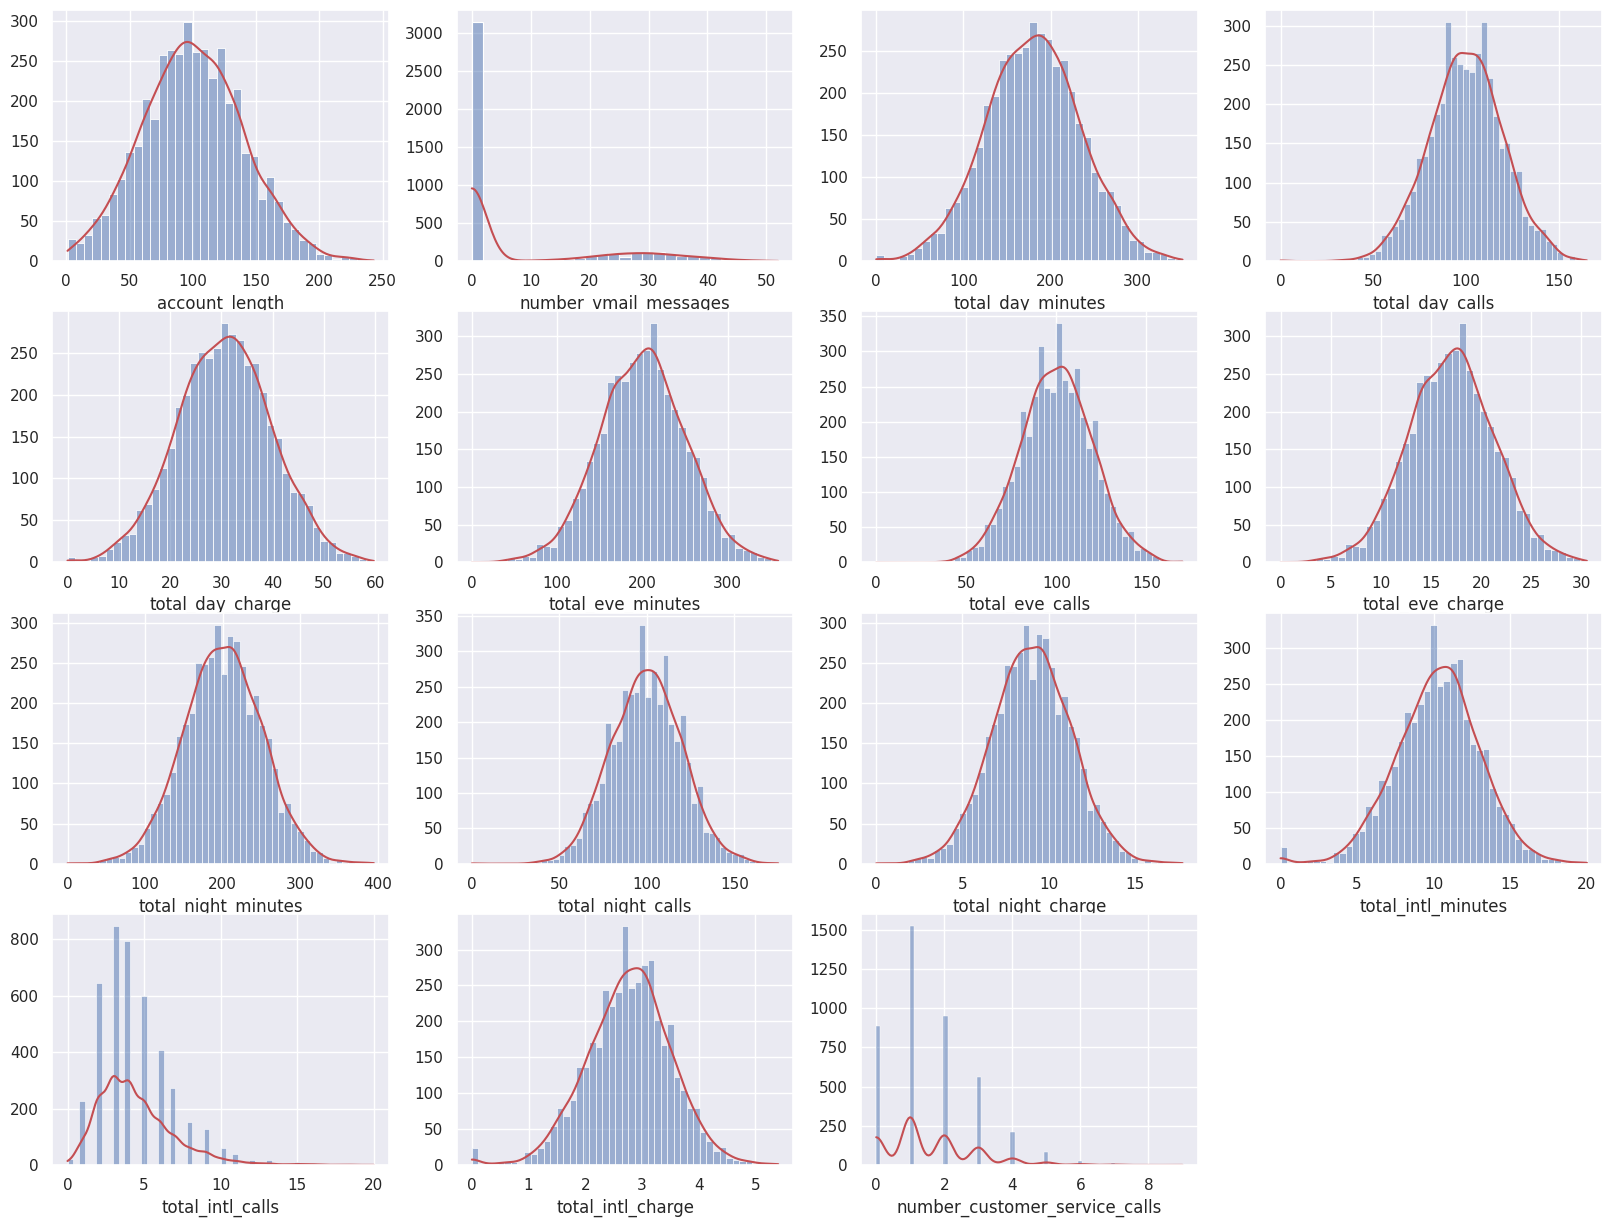

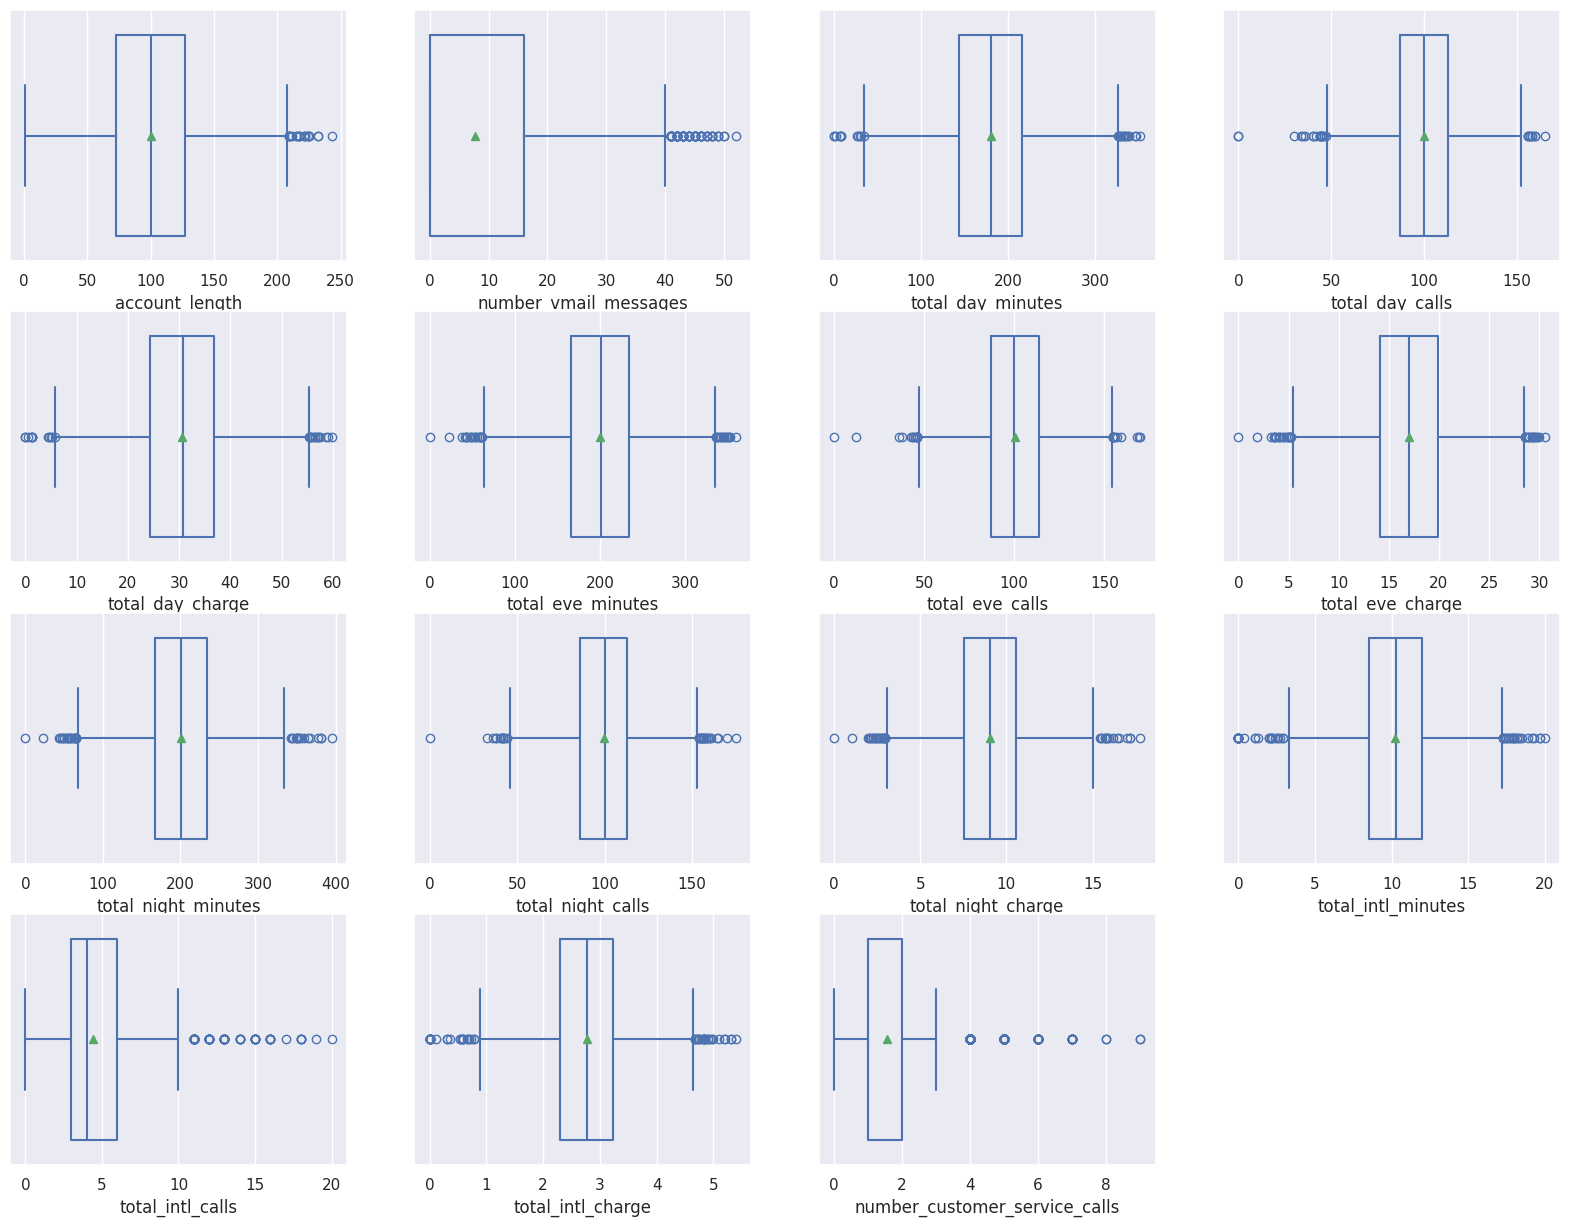

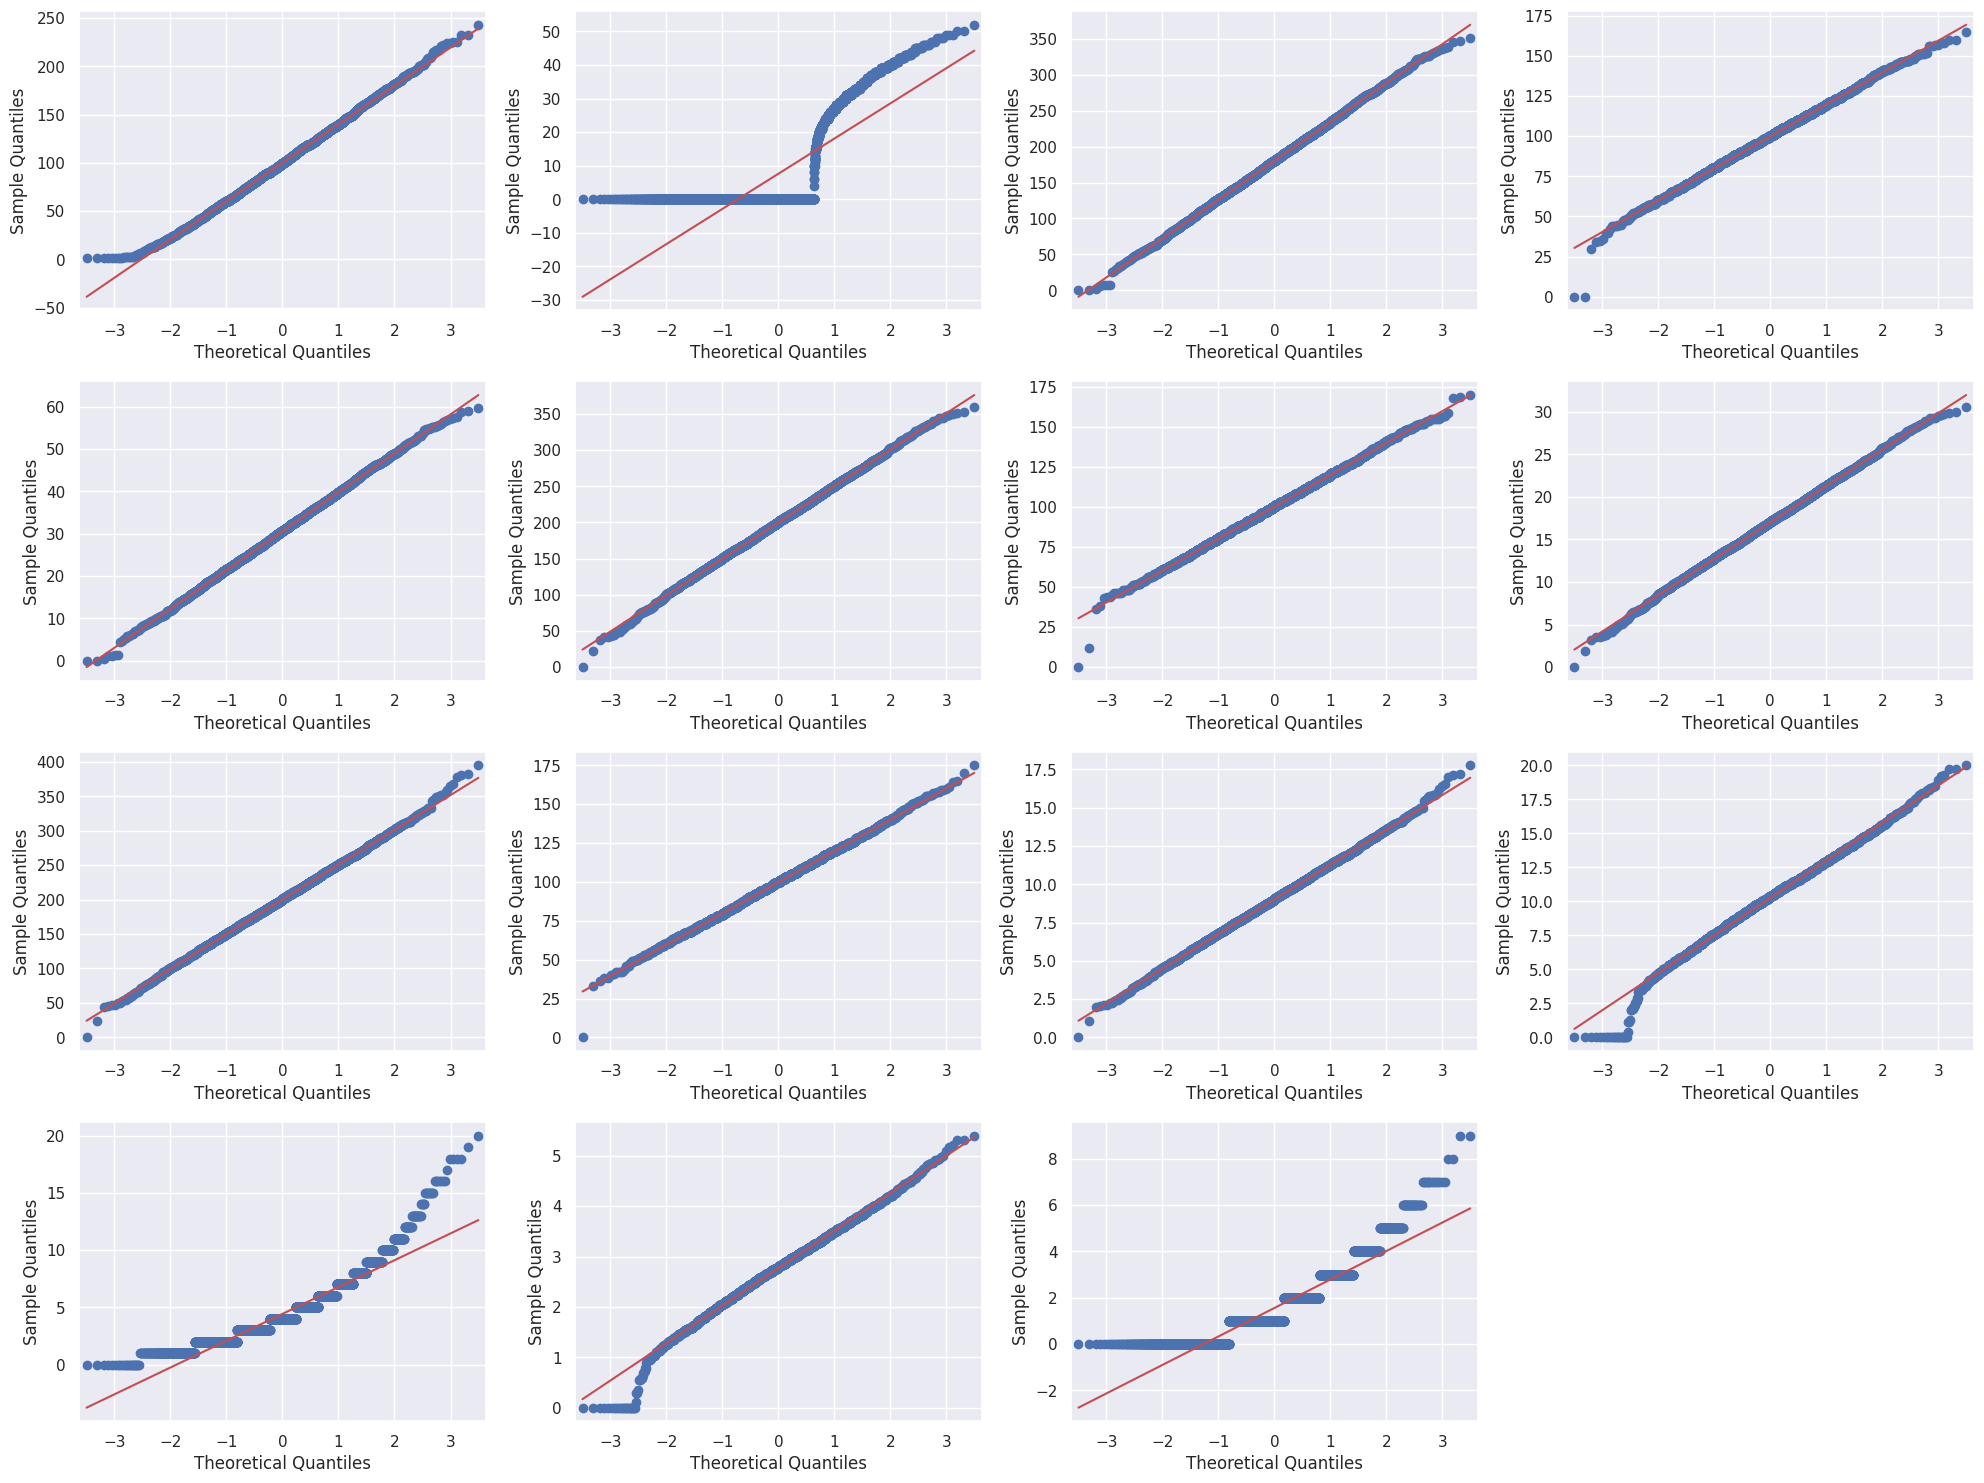

In [26]:
# histogram + box + qq
## 
fig, axes_hist = plt.subplots(
    nrows=4, ncols=4, 
    sharex=False, sharey=False
)
fig.set_figwidth(20); fig.set_figheight(15)

fig, axes_box = plt.subplots(
    nrows=4, ncols=4, 
    sharex=False, sharey=False
)
fig.set_figwidth(20); fig.set_figheight(15)

fig, axes_qq = plt.subplots(
    nrows=4, ncols=4, 
    sharex=False, sharey=False
)
fig.set_figwidth(20); fig.set_figheight(15)

axes = dict(
    hist=axes_hist, 
    box=axes_box, 
    qq=axes_qq
)

##
names = num_cols.copy()
names.append('0')
names = np.array(names)\
    .reshape(4, 4)

##
def plot_hist(i: int, j: int) -> None:
    g = sns.histplot(
        data=df_base[names[i, j]], 
        kde=True, 
        ax=axes['hist'][i, j]
    )
    g.axes.lines[0].set_color('r')
    g.set_ylabel(None)

def plot_box(i: int, j: int) -> None:
    g = sns.boxplot(
        data=df_base[names[i, j]], 
        showmeans=True, fill=False,
        orient='h', 
        ax=axes['box'][i, j]
   )
    
def plot_qq(i: int, j: int) -> None:
    g = qqplot(
        data=df_base[names[i, j]], 
        line='r',
        ax=axes['qq'][i, j]
    )

##
for i in range(4):
    for j in range(4):
        if names[i, j] != '0':
            plot_hist(i, j)
            plot_box(i, j)
            plot_qq(i, j)
        else:
            axes['hist'][i, j].set_visible(False)
            axes['box'][i, j].set_visible(False)
            axes['qq'][i, j].set_visible(False)

plt.tight_layout()
plt.show()